<a href="https://colab.research.google.com/github/Addyanalyzes14/llm_answer_evaluator_project/blob/main/llm_answer_evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers pandas torch


In [2]:
from transformers import pipeline
import pandas as pd

# Load GPT-2 text-generation pipeline
generator = pipeline('text-generation', model='gpt2')

prompts = [
    "Explain the concept of insurance underwriting.",
    "What is a risk premium in insurance?",
    "How does machine learning impact education technology?",
]

def evaluate_response(prompt, response):
    keywords = [word.lower() for word in prompt.split() if len(word) > 3]
    matches = sum(1 for kw in keywords if kw in response.lower())
    context_accuracy = matches / len(keywords) if keywords else 0
    relevance = min(len(response) / max(len(prompt), 1), 1)
    hallucination = 1 if ("i don't know" in response.lower() or "as an ai" in response.lower()) else 0
    return round(context_accuracy, 2), round(relevance, 2), hallucination

results = []

for prompt in prompts:
    output = generator(prompt, max_length=150, num_return_sequences=1)
    response = output[0]['generated_text']

    context_acc, relevance, hallucination = evaluate_response(prompt, response)

    results.append({
        "Prompt": prompt,
        "Response": response,
        "Context Accuracy": context_acc,
        "Relevance": relevance,
        "Hallucination Detected": hallucination,
    })

df = pd.DataFrame(results)
df.to_csv("huggingface_llm_evaluation_results.csv", index=False)

print("Evaluation complete. Results saved to 'huggingface_llm_evaluation_results.csv'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_t

Evaluation complete. Results saved to 'huggingface_llm_evaluation_results.csv'


In [3]:
df.head()  # shows first 5 evaluations


,Prompt,Response,Context Accuracy,Relevance,Hallucination Detected
0,Explain the concept of insurance underwriting.,Explain the concept of insurance underwriting....,1.0,1,0
1,What is a risk premium in insurance?,What is a risk premium in insurance? If you li...,1.0,1,0
2,How does machine learning impact education tec...,How does machine learning impact education tec...,1.0,1,0


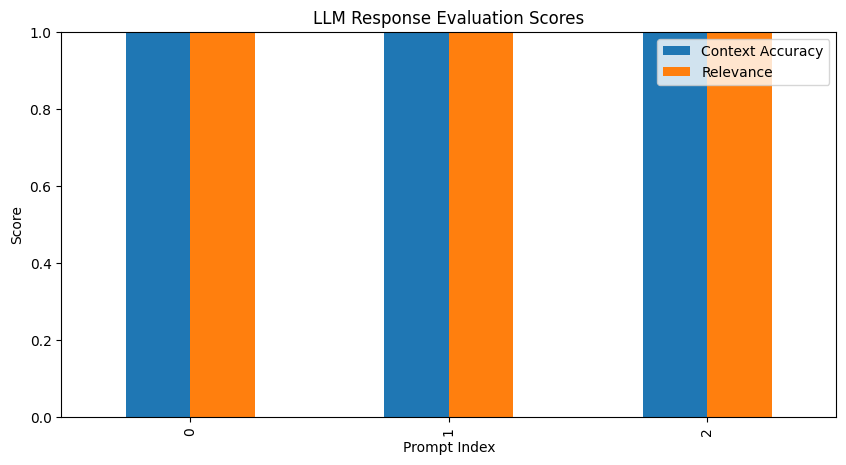

In [4]:
import matplotlib.pyplot as plt

df[["Context Accuracy", "Relevance"]].plot(kind='bar', figsize=(10, 5))
plt.title("LLM Response Evaluation Scores")
plt.xlabel("Prompt Index")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


In [5]:
#Mini Test Code
from transformers import pipeline
import pandas as pd

# Load GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Single test prompt
test_prompt = "What is the importance of data privacy in education?"

# Generate response
response = generator(test_prompt, max_length=100, num_return_sequences=1)[0]['generated_text']

# Basic evaluation
def evaluate_response(prompt, response):
    keywords = [word.lower() for word in prompt.split() if len(word) > 3]
    matches = sum(1 for kw in keywords if kw in response.lower())
    context_accuracy = matches / len(keywords) if keywords else 0
    relevance = min(len(response) / max(len(prompt), 1), 1)
    hallucination = 1 if ("i don't know" in response.lower() or "as an ai" in response.lower()) else 0
    return round(context_accuracy, 2), round(relevance, 2), hallucination

# Run evaluation
context_acc, relevance, hallucination = evaluate_response(test_prompt, response)

# Print everything
print(" Prompt:", test_prompt)
print(" Response:", response)
print("Context Accuracy:", context_acc)
print(" Relevance:", relevance)
print(" Hallucination Detected:", hallucination)


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


 Prompt: What is the importance of data privacy in education?
 Response: What is the importance of data privacy in education?

There are a number of factors that determine how well students learn. First and foremost, students will learn much better when they learn their own content. Second, they will learn more quickly, as they learn more. Third, students will learn much more when they know facts and facts about their own characters. Fourth, students will learn more when they know information about their own friends. Fifth, they will learn better when they know about their own culture. Sixth, they will learn more when they know about their own cultures.

How do I get an accurate picture of student learning?

Students learn better when they know facts and facts about their own characters. They learn more when they know about their own styles and traditions. They learn better when they know about their own personalities, personalities and personalities.

Can I help my students know how t

In [6]:
pip install -U kaleido